# Title

Here's a [question from the Reddit statistics forum](https://www.reddit.com/r/statistics/comments/1cqg0d6/q_youtube_video_where_the_creator_attended_a/).

>  A while ago I watched a YouTube video where the creator told the story that he went to a science conference and he was bored so he started measuring the number of times and the intervals between when the speakers said “ehhh” or “emmm”. He discovered the mean was equal to the variance, and spent the latter part of the video explaining why he thought this was a Poisson process and what can be learnt from it.

> I can’t find it anywhere, I don’t remember the title or the name of the channel. Does anyone know? 

[It's here]()

Update the link...

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/DataQnA/blob/main/nb/XXX.ipynb).

I'll download a utilities module with some of my frequently-used functions, and then import the usual libraries.

In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/DataQnA/raw/main/nb/utils.py')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils import decorate

In [3]:
# install the empiricaldist library, if necessary

try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

## Answer

In [5]:
download('https://raw.githubusercontent.com/notDavidsGit/uhmmmsData/main/uhmms_publicVersion.csv')

Downloaded uhmms_publicVersion.csv


'uhmms_publicVersion.csv'

In [12]:
df = pd.read_csv('uhmms_publicVersion.csv')
professional = df.loc[0]
df = df.drop(index=0).replace(0, np.nan)
df

,1,2,3,4a,5,6,7,8,9,10,...,30,31,32,33,34,35a,35b,36,37,38
1,156.189129,18.287924,5.716667,8.566563,11.007572,10.880978,9.684331,2.427521,4.158846,3.273735,...,2.625,7.6650,9.1305,109.000005,77.900004,3.850001,12.874485,15.687501,24.354284,7.507038
2,2.416570,4.756356,2.636593,28.591272,5.203077,1.333333,0.935780,1.026989,3.207831,11.775922,...,9.225,26.3608,47.3818,8.450001,18.200001,15.300002,11.874525,2.520834,102.931744,18.381962
3,15.799369,2.534259,6.110195,21.399258,15.192085,23.163785,0.650880,7.854320,17.613728,0.801862,...,1.050,11.3028,14.3960,110.450006,9.075000,8.524857,19.199233,1.979166,74.065260,12.151900
4,225.597393,1.573624,12.175269,6.800000,1.553463,16.436520,0.684817,1.203545,2.706110,1.670329,...,5.250,48.3742,94.5109,1.475000,105.173298,2.649894,6.499740,7.541667,3.228572,15.213512
5,10.966667,33.813675,4.216213,2.550000,31.027056,0.851981,19.476464,6.464309,42.143022,3.524489,...,2.450,6.1283,17.6890,41.000003,47.048119,5.974761,4.699812,8.876984,10.047942,339.787670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.179838,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.648887,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.368250,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.796852,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
summary = df.describe()
summary

,1,2,3,4a,5,6,7,8,9,10,...,30,31,32,33,34,35a,35b,36,37,38
count,56.000000,73.000000,74.000000,35.000000,160.000000,117.000000,27.000000,298.000000,56.000000,202.000000,...,154.000000,92.000000,65.000000,11.000000,68.000000,117.000000,111.000000,53.000000,32.000000,21.000000
mean,54.381078,88.080670,18.643189,46.086570,13.167455,15.622566,50.658060,10.285966,80.489897,6.740673,...,15.943382,21.456296,31.209854,75.043487,47.415831,16.982779,20.617316,19.366259,62.384678,177.234046
std,68.213970,129.539939,16.101857,57.920293,10.722984,16.568828,101.853630,9.864809,124.836447,5.922070,...,17.120249,23.938341,39.714742,85.659932,44.066733,14.835323,21.187480,21.695768,74.938951,269.034938
min,0.966628,0.436783,0.666667,2.383333,0.668400,0.851981,0.650880,0.726123,1.177242,0.484528,...,0.250000,1.539800,3.104900,1.475000,0.825000,2.074917,0.149994,1.979166,2.769348,1.431176
25%,10.528745,5.979781,6.613955,11.107318,5.424506,5.002729,1.069221,3.639449,3.320004,2.898027,...,4.881050,6.548550,9.130500,25.948964,16.624335,6.499740,8.249670,7.562197,10.644649,15.213512
50%,26.590604,31.897432,14.090931,25.981860,10.873960,10.122434,11.876020,6.877769,30.079056,4.919313,...,10.199800,13.395850,16.859100,34.173634,35.236092,12.474501,14.574417,10.395418,33.805298,66.143024
75%,73.702118,94.795536,25.339174,44.052650,17.129621,21.561545,32.781098,14.166334,117.109292,8.339405,...,20.655450,28.144725,38.056200,109.725005,70.553431,21.924125,25.548980,27.519734,75.629401,213.780126
max,317.920630,565.585517,90.938504,288.772003,54.837179,107.956325,440.000000,87.769520,610.216277,33.340575,...,90.196400,156.649700,221.900500,291.788869,261.939532,100.170997,127.094922,126.849097,320.123082,1061.342106


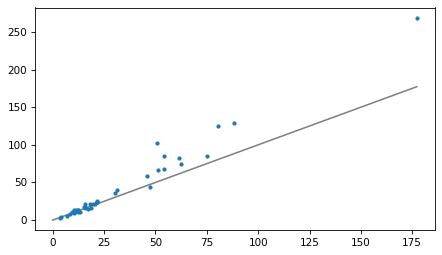

In [21]:
ms = summary.loc['mean']
ss = summary.loc['std']

high = ms.max()
plt.plot([0, high], [0, high], color='gray')
plt.plot(ms, ss, '.')
decorate()

In [27]:
from empiricaldist import Pmf

def make_surv(seq):
    """Make a non-standard survival function, P(X>=x)"""
    pmf = Pmf.from_seq(seq)
    surv = pmf.make_surv() + pmf

    # correct for numerical error
    surv.iloc[0] = 1
    return Surv(surv)

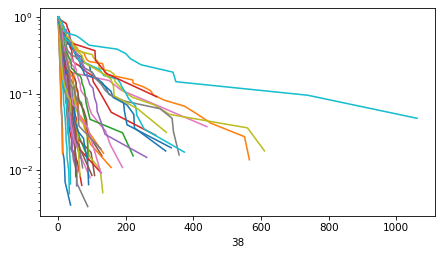

In [28]:
for col in df.columns:
    sf = make_surv(df[col])
    sf.plot(label='')
    
decorate(yscale='log')

In [46]:
from scipy.stats import binom

def sf_error_bounds(dist, n, qs, con_level=0.95):
    """Find the bounds on a normal CDF analytically.

    dist: scipy.stats distribution object
    n: sample size
    qs: quantities
    alpha: fraction excluded from the CI

    returns: tuple of arrays (low, high)
    """
    # find the correct probabilities
    ps = dist.sf(qs)

    # find the upper and lower percentiles of
    # a binomial distribution
    p_low = (1 - con_level) / 2
    p_high = 1 - p_low

    low = binom.ppf(p_low, n, ps) / n
    low[ps == 1] = 1
    high = binom.ppf(p_high, n, ps) / n
    return low, high

In [47]:
ts = df['1']
ts.describe()

count     56.000000
mean      54.381078
std       68.213970
min        0.966628
25%       10.528745
50%       26.590604
75%       73.702118
max      317.920630
Name: 1, dtype: float64

In [48]:
n = ts.count()
lam = ts.mean()
n, lam

(56, 54.38107757142858)

In [49]:
from scipy.stats import expon

dist = expon(scale=lam)
dist.mean()

54.38107757142858

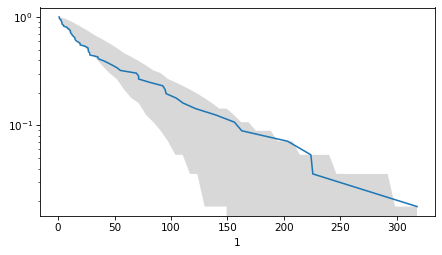

In [57]:
qs = np.linspace(0, ts.max())
low, high = sf_error_bounds(dist, n, qs)
plt.fill_between(qs, low, high, color='gray', alpha=0.3, lw=0)

sf = make_surv(ts)
sf.plot(label='')
    
decorate(yscale='log')

In [58]:
def poisson_plot(ts):
    n = ts.count()
    lam = ts.mean()
    dist = expon(scale=lam)

    qs = np.linspace(0, ts.max())
    low, high = sf_error_bounds(dist, n, qs)
    plt.fill_between(qs, low, high, color='gray', alpha=0.3, lw=0)

    sf = make_surv(ts)
    sf.plot(label='')

    decorate(yscale='log')

/tmp/ipykernel_890367/3801732769.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


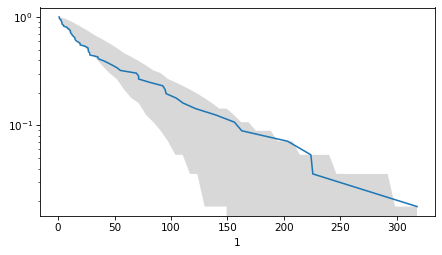

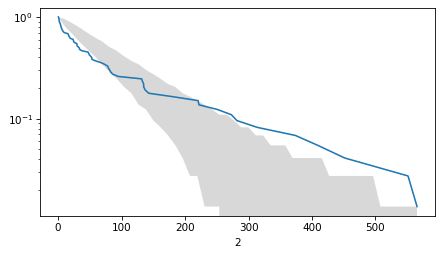

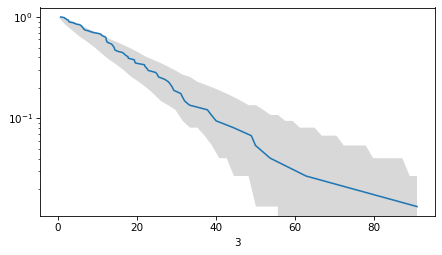

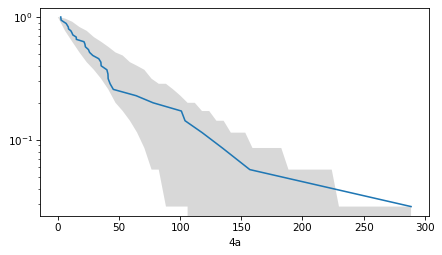

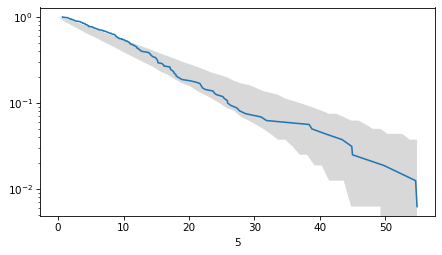

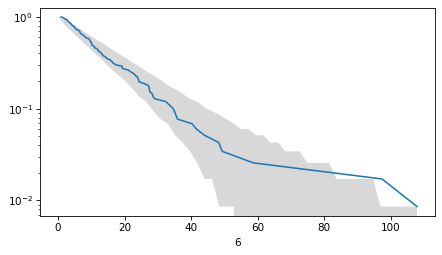

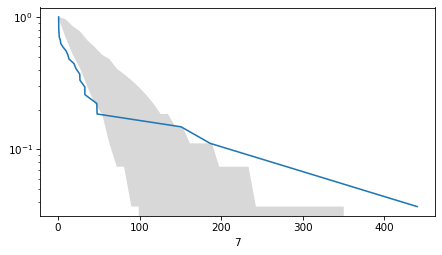

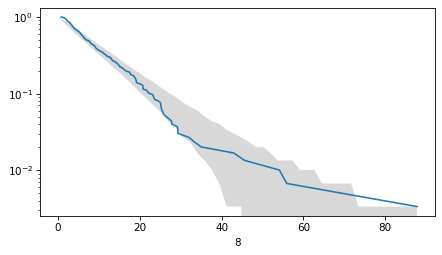

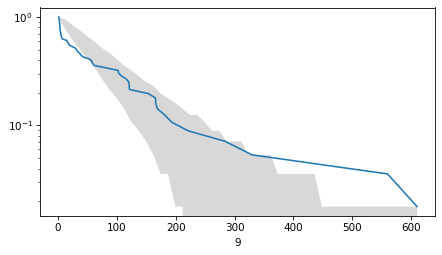

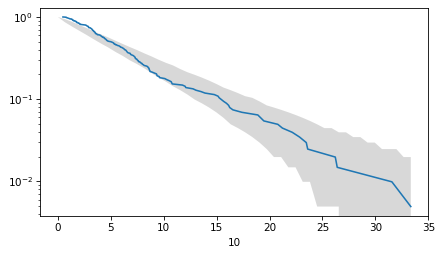

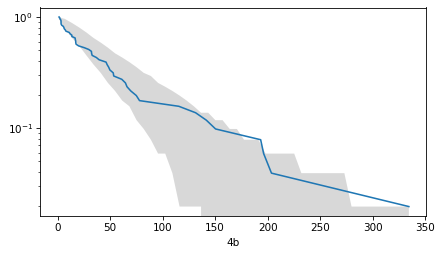

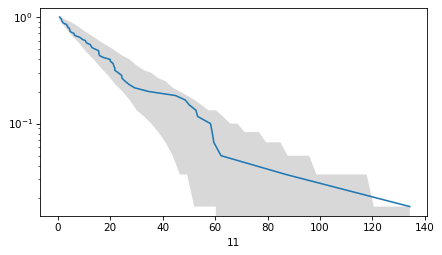

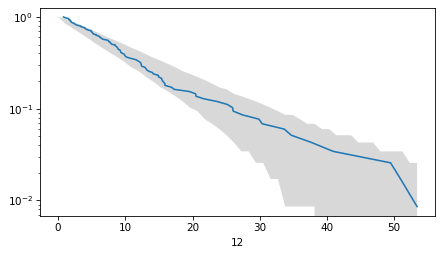

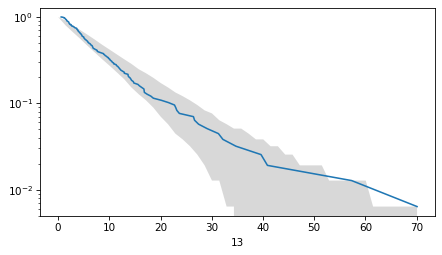

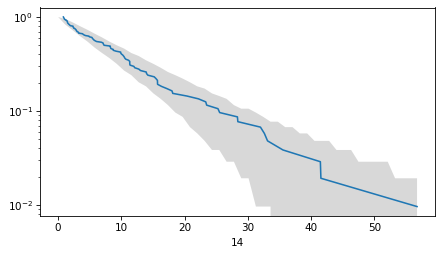

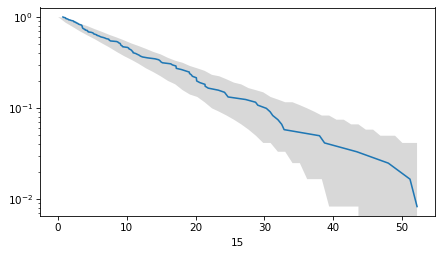

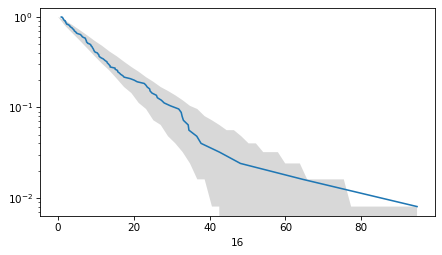

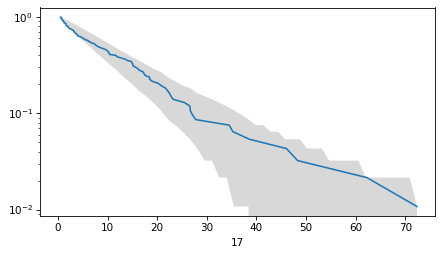

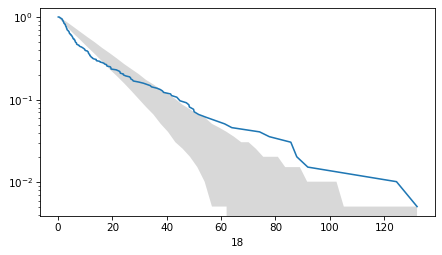

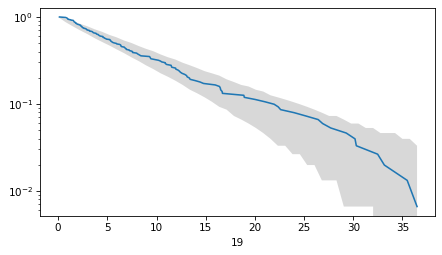

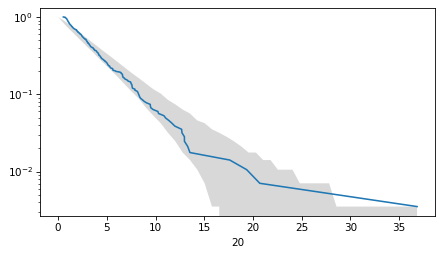

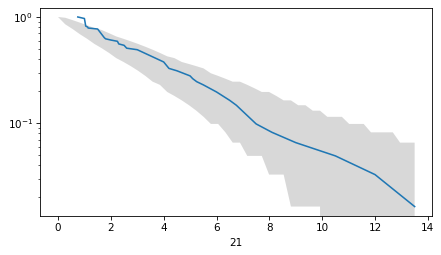

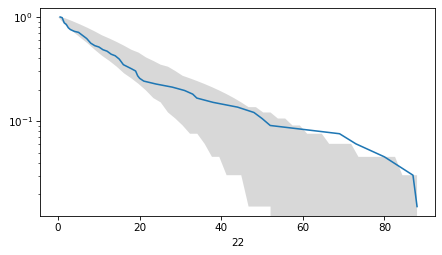

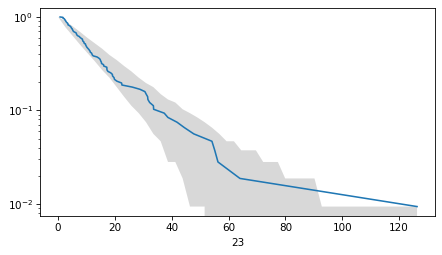

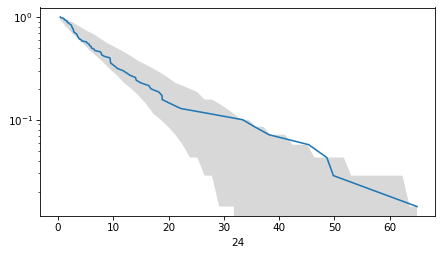

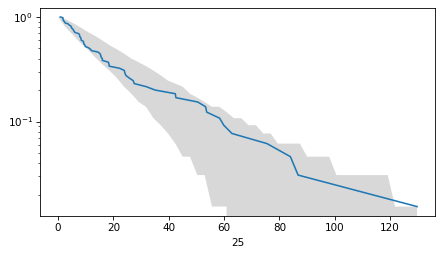

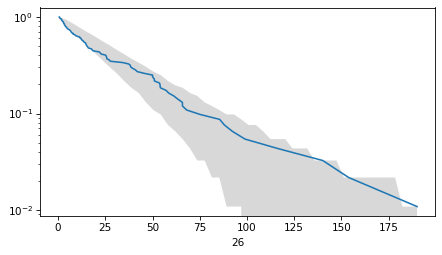

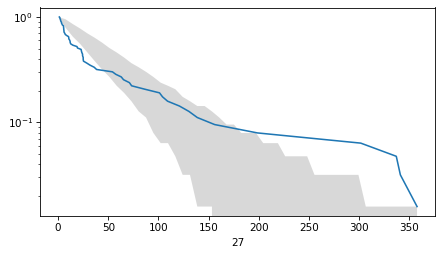

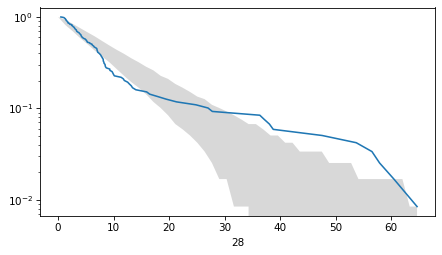

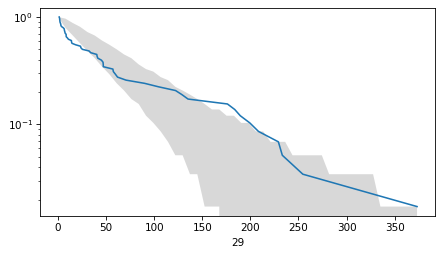

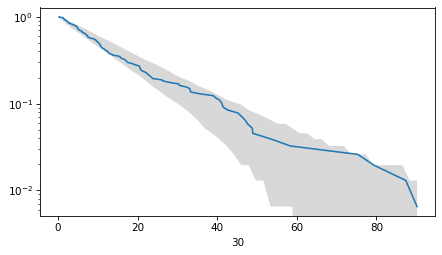

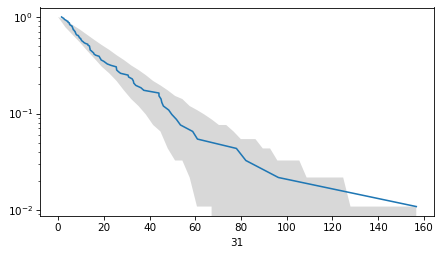

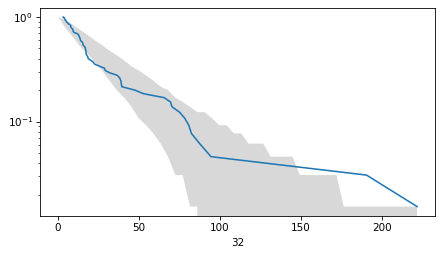

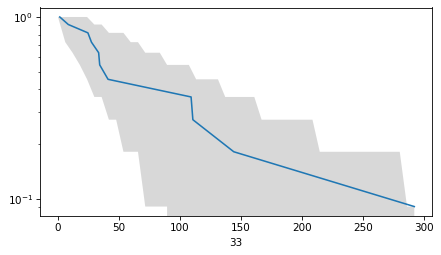

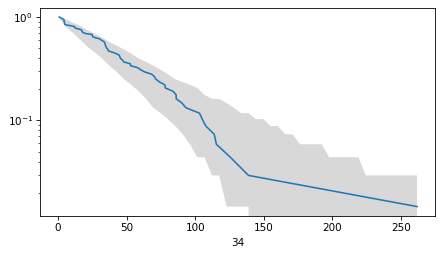

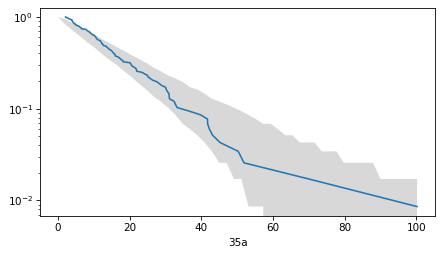

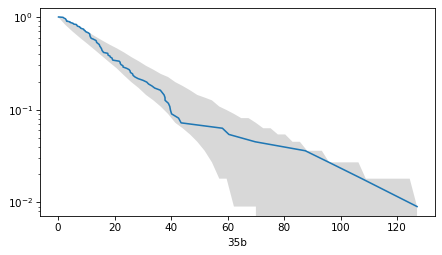

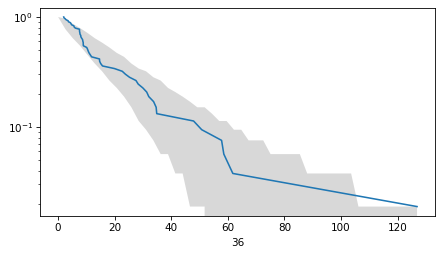

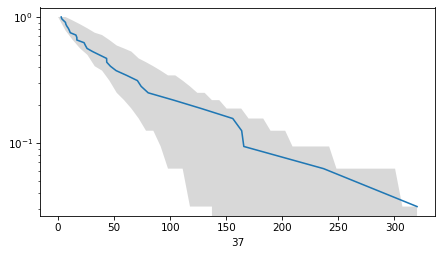

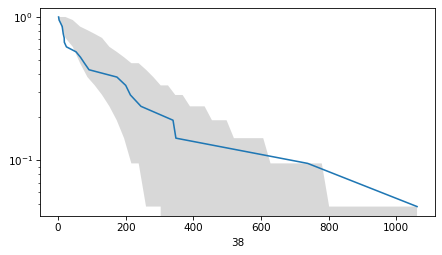

In [60]:
for col in df.columns:
    plt.figure()
    poisson_plot(df[col])

## Discussion

[*Data Q&A: Answering the real questions with Python*](https://allendowney.github.io/DataQnA/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)